In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
#propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/datos para el tp2/set_datos_propiedades.csv')
propiedades = pd.read_csv('/home/mati/Desktop/set_datos_propiedades.csv')

In [3]:
propiedades = propiedades.loc[(propiedades.price_aprox_usd.notnull()) & (propiedades.superficie.notnull()),\
                             ['place_name_encoded', 'property_type_encoded','price_aprox_usd','superficie',\
                             'Year','Month','seguridad','aire','gimnasio','cochera','pileta']]

In [4]:
columnas = ['superficie','place_name_encoded','property_type_encoded','seguridad','gimnasio', 'aire', 'pileta', 'cochera']
columnas_precio = columnas + ['price_aprox_usd']

In [5]:
prop = propiedades.loc[(propiedades.Year >= 2016), columnas]

## SVD

In [6]:
svd = TruncatedSVD()

In [7]:
resultado = svd.fit_transform(prop)

In [8]:
resultado = pd.DataFrame(resultado)

In [9]:
resultado.describe()

,0,1
count,6.834000e+05,683400.000000
mean,6.021008e+03,390.021272
std,3.421428e+06,164.553435
min,1.000001e+00,-10.914956
25%,4.700016e+01,223.004361
50%,8.000007e+01,457.000464
75%,1.700000e+02,504.006605
max,2.000000e+09,649.003991


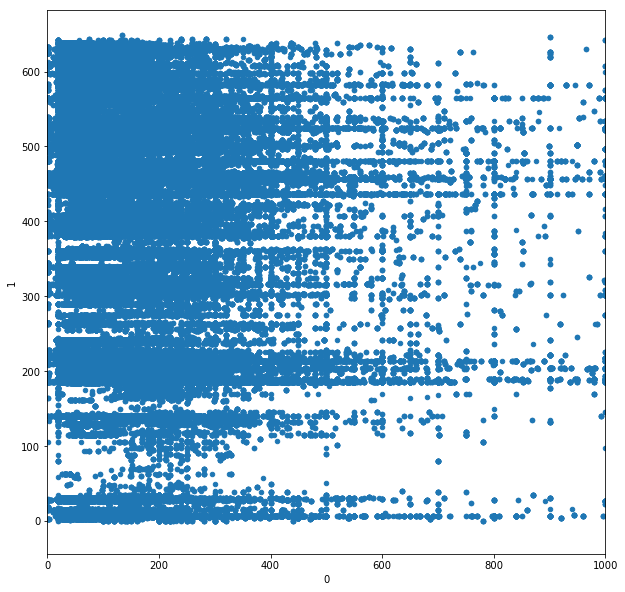

In [10]:
plot = resultado.plot.scatter(x = 0, y = 1, figsize = (10,10));
plot.set_xlim([0, 1000]);

## PCA

In [10]:
pca = PCA(n_components = 2)

In [11]:
resultado = pca.fit_transform(prop)

In [12]:
resultado = pd.DataFrame(resultado)

In [13]:
resultado.describe()

,0,1
count,6.834000e+05,6.834000e+05
mean,1.967852e-12,7.702890e-15
std,3.421428e+06,1.645529e+02
min,-6.020008e+03,-2.589803e+02
25%,-5.974008e+03,-1.139805e+02
50%,-5.941008e+03,-6.697996e+01
75%,-5.851008e+03,1.670195e+02
max,1.999994e+09,3.900200e+02


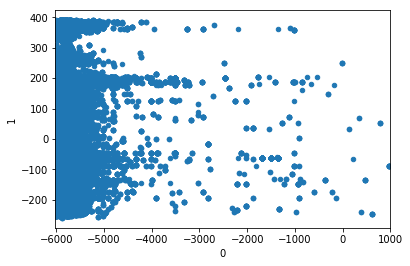

In [15]:
plot = resultado.plot.scatter(x = 0, y = 1);
plot.set_xlim([-6.020008e+03, 1000]);

## TSNE

In [22]:
tsne = TSNE()

In [ ]:
resultado = tsne.fit_transform(prop)

In [ ]:
resultado = pd.DataFrame(resultado)

In [ ]:
resultado.describe()

In [ ]:
plot = resultado.plot.scatter(x = 0, y = 1);
plot.set_xlim([0, 1000]);

#### TSNE Me tira Memory Error

# SVD con lat lon en lugar de place_name

In [11]:
#propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/datos para el tp2/set_datos_propiedades.csv')
propiedades = pd.read_csv('/home/mati/Desktop/set_datos_propiedades.csv')

In [12]:
propiedades = propiedades.loc[(propiedades.price_aprox_usd.notnull()) & (propiedades.superficie.notnull())\
                              & (propiedades.lat.notnull()) & (propiedades.lon.notnull()),\
                             ['lat', 'lon', 'property_type_encoded','price_aprox_usd','superficie',\
                             'Year','Month','seguridad','aire','gimnasio','cochera','pileta']]

In [13]:
columnas = ['superficie','lat', 'lon','property_type_encoded','seguridad','gimnasio', 'aire', 'pileta', 'cochera']
columnas_precio = columnas + ['price_aprox_usd']

In [14]:
prop = propiedades.loc[(propiedades.Year >= 2016), columnas]

## SVD

In [15]:
svd = TruncatedSVD()

In [16]:
resultado = svd.fit_transform(prop)

In [17]:
resultado = pd.DataFrame(resultado)

In [18]:
resultado.describe()

,0,1
count,5.190310e+05,519031.000000
mean,7.836469e+03,67.982655
std,3.925978e+06,0.496153
min,1.000002e+00,-31.026247
25%,4.500000e+01,67.907712
50%,7.500000e+01,67.947335
75%,1.500000e+02,68.026304
max,2.000000e+09,86.212812


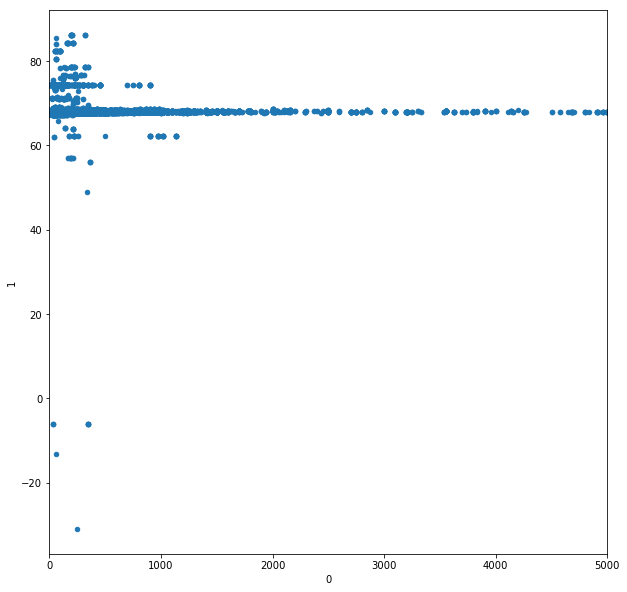

In [22]:
plot = resultado.plot.scatter(x = 0, y = 1, figsize = (10,10));
plot.set_xlim([0, 5000]);

### Son mas o menos lineales